In [2]:
import pandas as pd

In [3]:
cd ~\Desktop\\Repositories\\Gilman_earning\\Python_tutorials\data_files

C:\Users\agilman\Desktop\Repositories\Gilman_earning\Python_tutorials\data_files


In [4]:
###### Importing data and dropping Nan Rows ###############
df_0 = pd.read_excel("K78_SFPM.xlsx", sheet_name = "Data", header = [0,1])
df_0.dropna(axis = 1, how = "all", inplace = True)

# Mmulti-index Columns


### Levels of multi-index

Can access levels of hierarchical index - very useful for real world datasets


In [5]:
# Can identify all the values in each column-level  index

df_0.columns # returns a list of tuples, each value in each tuple returns a level value for that row 

MultiIndex([('Viable Cell Density (10e5 cell/ml)', 'Condition'),
            ('Viable Cell Density (10e5 cell/ml)',     'Flask'),
            ('Viable Cell Density (10e5 cell/ml)',           3),
            ('Viable Cell Density (10e5 cell/ml)',           6),
            ('Viable Cell Density (10e5 cell/ml)',           9),
            ('Viable Cell Density (10e5 cell/ml)',          12),
            ('Viable Cell Density (10e5 cell/ml)',          14),
            (              'ICA ((cells/ml)*day)',           3),
            (              'ICA ((cells/ml)*day)',           6),
            (              'ICA ((cells/ml)*day)',           9),
            (              'ICA ((cells/ml)*day)',          12),
            (              'ICA ((cells/ml)*day)',          14),
            (                         '% Viable ',           3),
            (                         '% Viable ',           6),
            (                         '% Viable ',           9),
            (            

In [13]:
# can selec individual levels of the columns index (returns the values present in the index)
print(df_0.columns.get_level_values(0))
print("\n")
print("\n")
print(df_0.columns.get_level_values(1))


Index(['Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)', 'ICA ((cells/ml)*day)',
       'ICA ((cells/ml)*day)', 'ICA ((cells/ml)*day)', 'ICA ((cells/ml)*day)',
       'ICA ((cells/ml)*day)', '% Viable ', '% Viable ', '% Viable ',
       '% Viable ', '% Viable ', 'Titer (ug/ml)', 'Titer (ug/ml)',
       'Titer (ug/ml)', 'Titer (ug/ml)'],
      dtype='object')




Index(['Condition',     'Flask',           3,           6,           9,
                12,          14,           3,           6,           9,
                12,          14,           3,           6,           9,
                12,          14,           6,           9,          12,
                14],
      dtype='object')


### slicing column level index

Can slice across the hierarchical column levels

In [40]:
#select level0 value

df_0["ICA ((cells/ml)*day)"].head()

,3,6,9,12,14
0,25.860,63.540,97.110,123.315,135.030
1,27.720,68.670,103.785,129.480,140.610
2,30.900,73.650,107.865,129.015,136.050
3,31.470,74.820,110.070,132.795,140.370
4,47.655,112.155,165.555,210.405,229.305


In [44]:
#select level 0 value and list of level1 values

df_0["ICA ((cells/ml)*day)"][[3,6,9]].head()

,3,6,9
0,25.860,63.540,97.110
1,27.720,68.670,103.785
2,30.900,73.650,107.865
3,31.470,74.820,110.070
4,47.655,112.155,165.555


In [48]:
# using the loc method may be more proper for more complex slices
df_0.loc[:, (["ICA ((cells/ml)*day)"],[3,6,9])].head()

ICA ((cells/ml)*day)                  
                     3        6        9
0               25.860   63.540   97.110
1               27.720   68.670  103.785
2               30.900   73.650  107.865
3               31.470   74.820  110.070
4               47.655  112.155  165.555

In [49]:
# Can select all the level0 and list from level 1 using slice
df_0.loc[:, (slice(None),[3,6,9])].head()

Viable Cell Density (10e5 cell/ml)              ICA ((cells/ml)*day)  \
                                   3     6      9                    3   
0                               4.84  12.4  12.72               25.860   
1                               4.88  13.6  13.70               27.720   
2                               5.50  15.1  13.40               30.900   
3                               5.48  15.5  13.40               31.470   
4                               7.07  24.7  18.30               47.655   

                    % Viable              Titer (ug/ml)          
         6        9         3     6     9             6       9  
0   63.540   97.110      97.0  95.1  90.5         533.9   947.5  
1   68.670  103.785      97.3  94.3  89.2         502.8   949.9  
2   73.650  107.865      96.0  94.0  84.3         535.4  1187.5  
3   74.820  110.070      96.8  93.9  85.0         528.5  1127.6  
4  112.155  165.555      99.1  98.3  97.1         633.9  1371.5

In [54]:
#can slice level 0 index, but neet to lexicographically order columns first
df_0.sort_index(axis =1, level = [0,1], ascending = True, inplace = True)

# Can select all the level0 and list from level 1 using slice
df_0.loc[:, (slice('% Viable ','Titer (ug/ml)'),[3,6,9])].head()

% Viable              ICA ((cells/ml)*day)                   Titer (ug/ml)  \
          3     6     9                    3        6        9             6   
0      97.0  95.1  90.5               25.860   63.540   97.110         533.9   
1      97.3  94.3  89.2               27.720   68.670  103.785         502.8   
2      96.0  94.0  84.3               30.900   73.650  107.865         535.4   
3      96.8  93.9  85.0               31.470   74.820  110.070         528.5   
4      99.1  98.3  97.1               47.655  112.155  165.555         633.9   

           
        9  
0   947.5  
1   949.9  
2  1187.5  
3  1127.6  
4  1371.5

### Set condition and flask as index, for 

In [59]:
# set_index required tuple coordinates for both level 0 and level 1 keys for the index 
df_0.set_index(("Viable Cell Density (10e5 cell/ml)", "Condition"), inplace = True)
df_0.set_index(("Viable Cell Density (10e5 cell/ml)", "Flask"), inplace = True, append = True)

In [66]:
# Change the names of the index
df_0.index.names = ["Clone", "Flask ID"]

In [70]:
df_0.columns.names = ["Parameter", "Day #"]

In [71]:
df_0.head()

Parameter        % Viable                          ICA ((cells/ml)*day)  \
Day #                   3     6     9     12    14                   3    
Clone   Flask ID                                                          
Clone 1 SF01          97.0  95.1  90.5  71.6  62.4               25.860   
        SF02          97.3  94.3  89.2  70.0  58.6               27.720   
Clone 2 SF03          96.0  94.0  84.3  62.4  28.8               30.900   
        SF04          96.8  93.9  85.0  63.2  32.9               31.470   
Clone 3 SF05          99.1  98.3  97.1  93.9  78.4               47.655   

Parameter                                            Titer (ug/ml)          \
Day #                  6        9        12       14            6       9    
Clone   Flask ID                                                             
Clone 1 SF01       63.540   97.110  123.315  135.030         533.9   947.5   
        SF02       68.670  103.785  129.480  140.610         502.8   949.9   
Clone 2 SF03       73.650  107.865  129.015  136.050         535.4  1187.5   
        SF04       74.820  110.070  132.795  140.370         528.5  1127.6   
Clone 3 SF05      112.155  165.555  210.405  229.305         633.9  1371.5   

Parameter                        Viable Cell Density (10e5 cell/ml)        \
Day #                 12      14                                 3     6    
Clone   Flask ID                                                            
Clone 1 SF01      1269.0  1442.5                               4.84  12.4   
        SF02      1230.2  1357.5                               4.88  13.6   
Clone 2 SF03      1626.4  1759.8                               5.50  15.1   
        SF04      1616.1  1567.7                               5.48  15.5   
Clone 3 SF05      2030.8  2360.0                               7.07  24.7   

Parameter                              
Day #                9      12     14  
Clone   Flask ID                       
Clone 1 SF01      12.72   9.66   7.81  
        SF02      13.70   9.71   7.42  
Clone 2 SF03      13.40   9.41   4.69  
        SF04      13.40  10.10   5.05  
Clone 3 SF05      18.30  17.30  12.60

In [84]:
df_1 = df_0.stack()

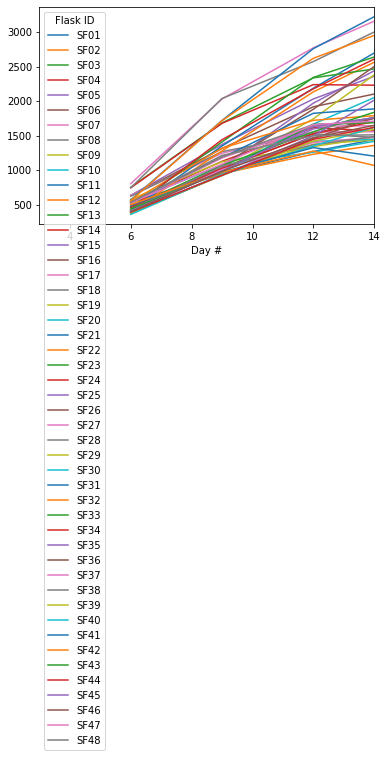

In [120]:
df_1.reset_index().pivot("Day #", "Flask ID", "Titer (ug/ml)").plot()

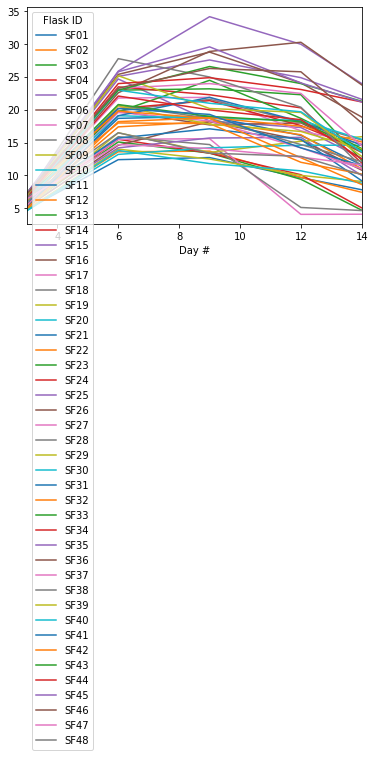

In [121]:
df_1.reset_index().pivot("Day #", "Flask ID", "Viable Cell Density (10e5 cell/ml)").plot()

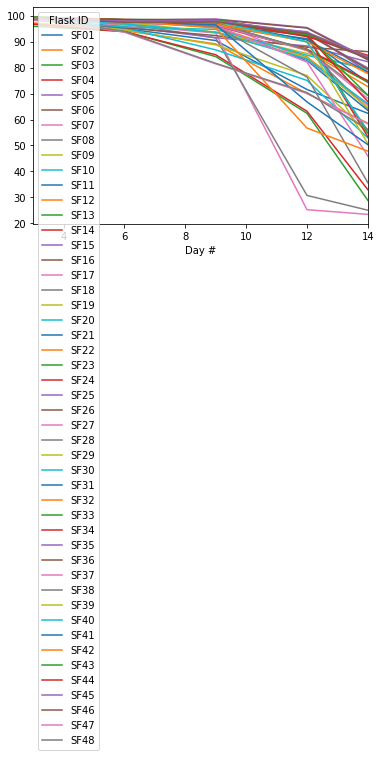

In [123]:
df_1.reset_index().pivot("Day #", "Flask ID", "% Viable ").plot()

In [113]:
df_1.reset_index(level = 2, inplace  = True )

Parameter         Day #  % Viable   ICA ((cells/ml)*day)  Titer (ug/ml)  \
Clone    Flask ID                                                         
Clone 1  SF01         3       97.0                25.860            NaN   
         SF01         6       95.1                63.540          533.9   
         SF01         9       90.5                97.110          947.5   
         SF01        12       71.6               123.315         1269.0   
         SF01        14       62.4               135.030         1442.5   
...                 ...        ...                   ...            ...   
Clone 24 SF48         3       99.4                34.740            NaN   
         SF48         6       94.0                79.590          531.6   
         SF48         9       81.7               119.040         1212.8   
         SF48        12       70.4               153.540         1498.9   
         SF48        14       56.2               168.690         1511.1   

Parameter          Viable Cell Density (10e5 cell/ml)  
Clone    Flask ID                                      
Clone 1  SF01                                    4.84  
         SF01                                   12.40  
         SF01                                   12.72  
         SF01                                    9.66  
         SF01                                    7.81  
...                                               ...  
Clone 24 SF48                                    6.66  
         SF48                                   16.50  
         SF48                                   13.40  
         SF48                                   12.90  
         SF48                                   10.10  

[240 rows x 5 columns]

In [100]:
a = df_1.groupby("Clone")

In [102]:
titer = a.mean()["Titer (ug/ml)"]

In [108]:
titer_sorted = titer.sort_values(ascending = True)

In [109]:
titer_sorted

Clone
Clone 21     974.2875
Clone 1     1029.1625
Clone 15    1035.1875
Clone 20    1070.9375
Clone 19    1076.7125
Clone 5     1101.2625
Clone 22    1142.7500
Clone 23    1159.7125
Clone 18    1170.0500
Clone 13    1189.8875
Clone 17    1204.6500
Clone 24    1216.9625
Clone 4     1234.1625
Clone 2     1243.6250
Clone 14    1256.5000
Clone 10    1333.0500
Clone 11    1349.6500
Clone 8     1460.0250
Clone 3     1544.3250
Clone 6     1627.9250
Clone 12    1690.4375
Clone 7     1765.9125
Clone 16    2014.5500
Clone 9     2140.1125
Name: Titer (ug/ml), dtype: float64

In [98]:
df_1["Viable Cell Density (10e5 cell/ml)"]

Clone     Flask ID  Day #
Clone 1   SF01      3         4.84
                    6        12.40
                    9        12.72
                    12        9.66
                    14        7.81
                             ...  
Clone 24  SF48      3         6.66
                    6        16.50
                    9        13.40
                    12       12.90
                    14       10.10
Name: Viable Cell Density (10e5 cell/ml), Length: 240, dtype: float64

In [92]:
a = df_1.groupby("Clone")

C:\Users\agilman\AppData\Local\Continuum\miniconda3\envs\data_wrangling\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Clone
Clone 1     AxesSubplot(0.125,0.125;0.775x0.755)
Clone 10    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 11    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 12    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 13    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 14    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 15    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 16    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 17    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 18    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 19    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 2     AxesSubplot(0.125,0.125;0.775x0.755)
Clone 20    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 21    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 22    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 23    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 24    AxesSubplot(0.125,0.125;0.775x0.755)
Clone 3     AxesSubplot(0.125,0.125;0.775x0.755)
Clone 4     AxesSubplot(0.125,0.125;0.775x0.755)
Clone 5     AxesSubplot(0.125,0.125;0.775x0.755)
Clone 6     Ax

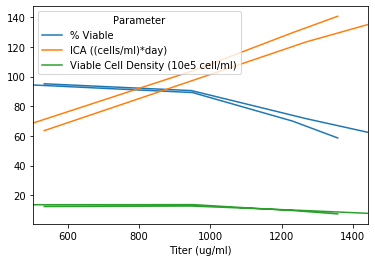

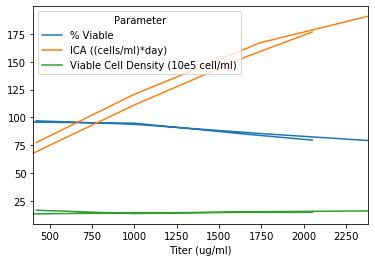

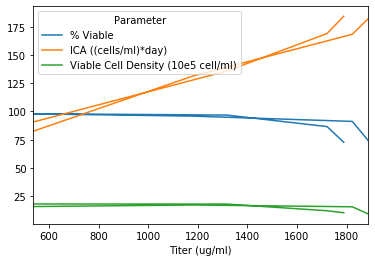

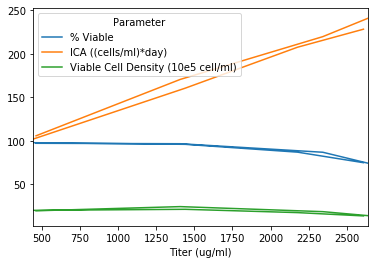

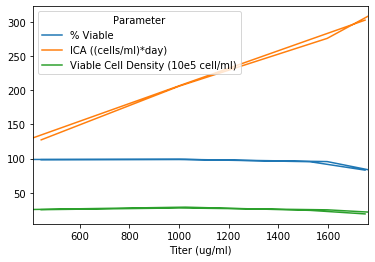

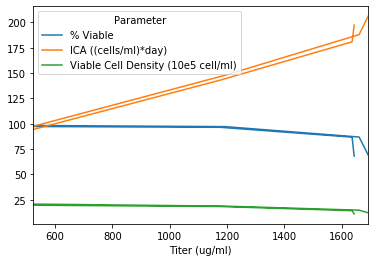

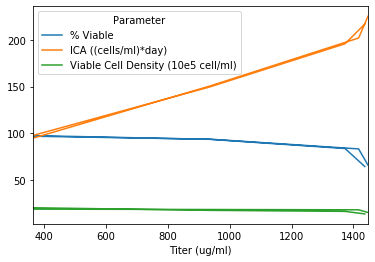

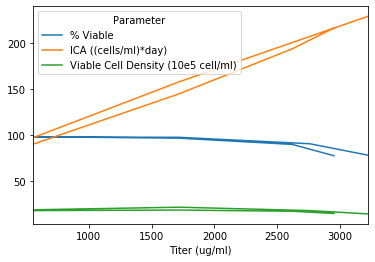

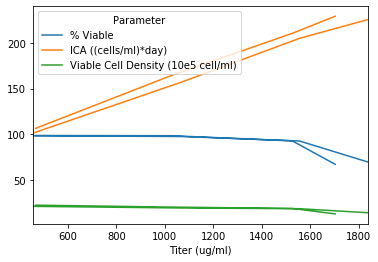

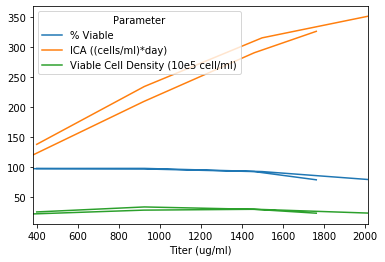

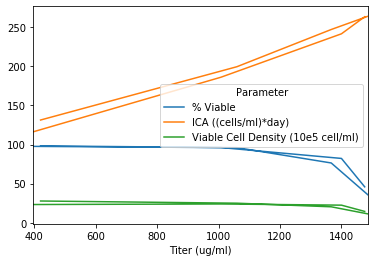

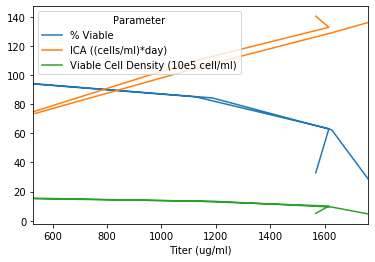

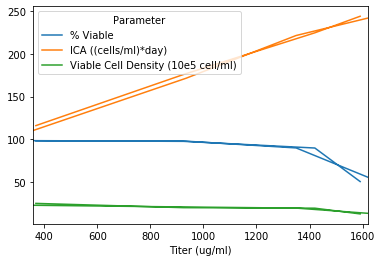

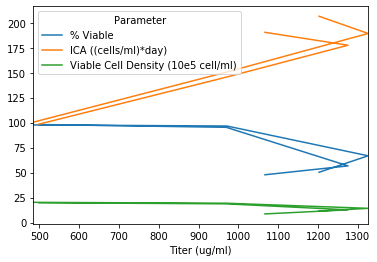

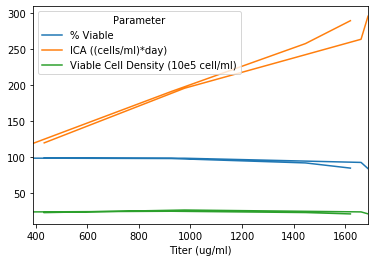

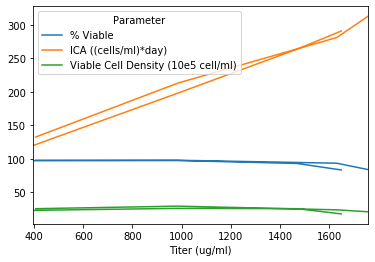

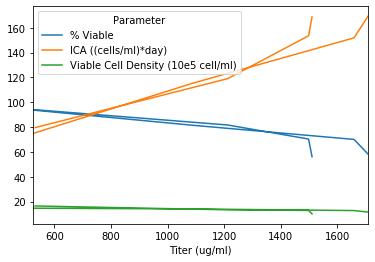

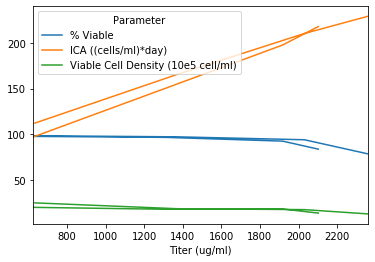

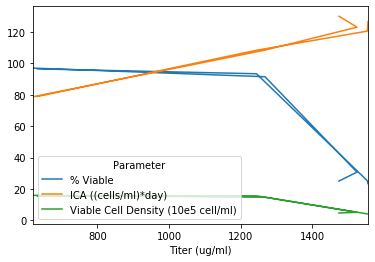

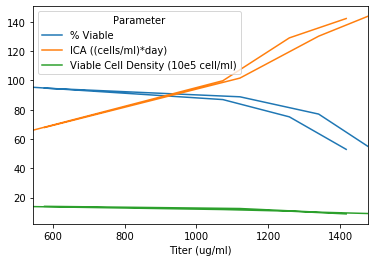

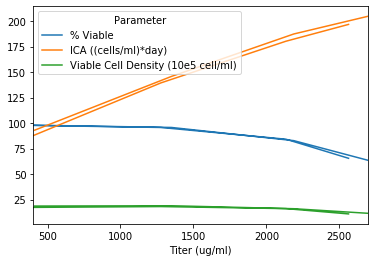

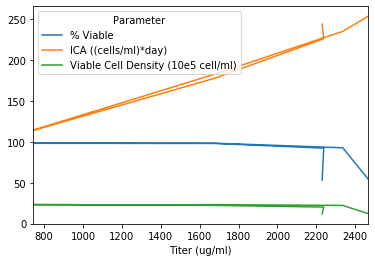

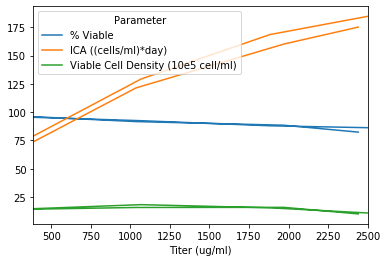

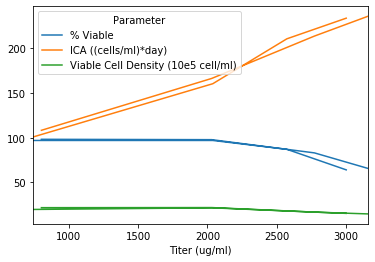

In [93]:
a.plot("Titer (ug/ml)")

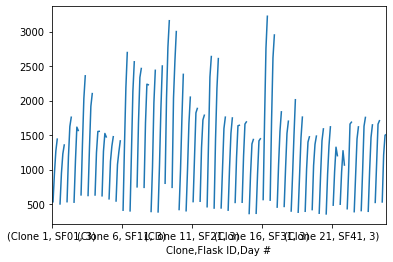

In [90]:
df_1["Titer (ug/ml)"].plot()

In [86]:
df_1.plot(x = "Day #" 

KeyError: 'Day #'

In [78]:
% matplotlib inline


Parameter         % Viable                          ICA ((cells/ml)*day)  \
Day #                    3     6     9     12    14                   3    
Clone    Flask ID                                                          
Clone 1  SF01          97.0  95.1  90.5  71.6  62.4               25.860   
         SF02          97.3  94.3  89.2  70.0  58.6               27.720   
Clone 2  SF03          96.0  94.0  84.3  62.4  28.8               30.900   
         SF04          96.8  93.9  85.0  63.2  32.9               31.470   
Clone 3  SF05          99.1  98.3  97.1  93.9  78.4               47.655   
         SF06          99.4  97.6  96.5  92.4  83.6               40.710   
Clone 4  SF07          98.9  96.5  93.4  25.2  23.4               32.235   
         SF08          99.0  97.0  91.5  30.7  25.0               32.850   
Clone 5  SF09          98.3  94.7  88.8  77.0  54.9               28.080   
         SF10          98.6  95.3  86.9  75.1  52.9               27.630   
Clone 6  SF11          99.2  97.9  95.7  82.8  63.5               36.510   
         SF12          99.0  97.7  95.7  84.2  65.5               34.365   
Clone 7  SF13          99.5  98.4  98.3  92.7  54.7               45.585   
         SF14          99.6  98.2  98.0  92.3  53.3               45.165   
Clone 8  SF15          98.5  95.9  91.6  88.4  82.3               29.325   
         SF16          98.6  95.4  92.4  87.9  86.2               29.625   
Clone 9  SF17          99.6  98.3  97.9  83.1  65.7               42.810   
         SF18          99.7  97.0  97.0  87.1  64.1               38.850   
Clone 10 SF19          98.4  96.9  93.8  85.5  79.2               32.385   
         SF20          98.6  95.7  94.8  84.8  79.6               26.760   
Clone 11 SF21          99.3  97.9  95.9  91.2  74.3               33.330   
         SF22          99.5  98.0  96.8  86.6  72.7               37.140   
Clone 12 SF23          99.1  97.3  96.8  87.0  74.4               39.615   
         SF24          99.2  98.0  96.1  87.1  75.0               39.765   
Clone 13 SF25          99.6  98.3  98.8  95.5  83.6               48.240   
         SF26          99.4  98.6  98.6  95.3  83.0               48.975   
Clone 14 SF27          98.4  97.3  96.5  86.8  68.1               37.515   
         SF28          98.6  98.3  97.2  86.9  69.3               38.610   
Clone 15 SF29          99.0  97.6  93.6  83.8  64.6               40.215   
         SF30          98.9  96.9  93.7  83.4  66.1               38.550   
Clone 16 SF31          99.0  98.0  97.7  90.7  78.3               36.270   
         SF32          99.2  98.3  96.8  90.0  77.7               34.815   
Clone 17 SF33          99.5  98.2  97.4  92.5  69.4               41.520   
         SF34          99.4  98.5  98.3  92.6  66.9               43.155   
Clone 18 SF35          99.4  98.3  98.4  93.1  79.9               48.270   
         SF36          99.4  97.9  97.5  93.1  79.4               43.710   
Clone 19 SF37          99.7  97.6  96.1  82.2  45.9               45.255   
         SF38          99.4  98.2  96.0  76.4  35.6               52.095   
Clone 20 SF39          99.6  98.4  97.7  89.9  50.7               47.985   
         SF40          99.5  98.5  97.9  90.0  55.7               44.385   
Clone 21 SF41          99.5  97.7  96.6  66.8  50.3               41.190   
         SF42          99.6  98.1  95.3  56.7  47.8               40.665   
Clone 22 SF43          99.6  98.6  98.5  92.7  84.1               45.435   
         SF44          99.2  98.6  98.1  92.0  84.8               45.840   
Clone 23 SF45          99.3  98.0  98.1  93.7  84.2               49.665   
         SF46          99.4  97.5  97.7  93.3  83.6               45.750   
Clone 24 SF47          99.3  93.7  81.5  70.1  58.3               31.725   
         SF48          99.4  94.0  81.7  70.4  56.2               34.740   

Parameter                                             Titer (ug/ml)          \
Day #                   6        9        12

### names of multi-index, 